# LOADING OF DATA

In [1]:
import pandas as pd

# Specify the path to your CSV file
file_path = 'oasis_longitudinal.csv'

# Load the CSV file into a pandas DataFrame
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to understand its content
print(data.head())

# Display the DataFrame's information to understand the structure, columns, and data types
data.info()


  Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  EDUC  \
0  OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87    14   
1  OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88    14   
2  OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75    12   
3  OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76    12   
4  OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80    12   

   SES  MMSE  CDR  eTIV   nWBV    ASF  
0  2.0  27.0  0.0  1987  0.696  0.883  
1  2.0  30.0  0.0  2004  0.681  0.876  
2  NaN  23.0  0.5  1678  0.736  1.046  
3  NaN  28.0  0.5  1738  0.713  1.010  
4  NaN  22.0  0.5  1698  0.701  1.034  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2  

# DEALING WITH CATEGORICAL DATA

In [2]:
# Display the data types of each column to identify categorical data
print(data.dtypes)

# Specifically identify columns with 'object' or 'category' data types
categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()

# Print out the categorical columns
print("Categorical columns:", categorical_columns)


Subject ID     object
MRI ID         object
Group          object
Visit           int64
MR Delay        int64
M/F            object
Hand           object
Age             int64
EDUC            int64
SES           float64
MMSE          float64
CDR           float64
eTIV            int64
nWBV          float64
ASF           float64
dtype: object
Categorical columns: ['Subject ID', 'MRI ID', 'Group', 'M/F', 'Hand']


In [3]:
# Load the CSV file into a pandas DataFrame
data = pd.read_csv('oasis_longitudinal.csv')

# Check if 'Hand' column has 'L'
left_handed = 'L' in data['Hand'].values

left_handed


False

Since all are right handed persons in the oasis longitudinal data set typically don't provide any useful information for predicting outcomes or explaining variability in the data.So,I want to drop the Hand column.

In [4]:
data.drop(['Subject ID', 'MRI ID'], axis=1, inplace=True)

 These identifiers do not contribute to analysis or modeling.So,I dropped these columns.

Here 'Group' is the target variable for the prediction of Alzhiemers Disease which can identify people with DEMENTIA OR NOT.


# MAPPING FOR 'GROUP' COLUMN AS THIS COLUMN CAN ACT AS POTENTIAL BIO-MARKER IDENTIFIERS FOR ALZHEIMERS DISEASE PRED, 'CONVERTED' INDICATES PATIENTS INITIALLY IDENTIFIED AS "NON-DEMENTIATED" LATER IDENTIFIED AS "DEMENTIATED". THESE PEOPLE CAN ACT AS POTENTIAL BIOMARKERS IDENTIFIERS

In [5]:
# Define a manual mapping based on requirement
custom_mapping = {'Nondemented': 0, 'Demented': 1, 'Converted': 2}

# Apply the mapping to the 'Group' column
data['Group_encoded'] = data['Group'].map(custom_mapping)

# Display the first few rows to verify the encoding
print(data[['Group', 'Group_encoded']].head())


         Group  Group_encoded
0  Nondemented              0
1  Nondemented              0
2     Demented              1
3     Demented              1
4     Demented              1


In [6]:
# Drop the 'Group' column
data.drop('Group', axis=1, inplace=True)

In [7]:
print(data.columns)

Index(['Visit', 'MR Delay', 'M/F', 'Hand', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR',
       'eTIV', 'nWBV', 'ASF', 'Group_encoded'],
      dtype='object')


In [8]:
#Label Encoding for "M/F"Column
from sklearn.preprocessing import LabelEncoder
# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply label encoder to 'M/F' column, MALE = 1,FEMALE =0
data['M/F'] = label_encoder.fit_transform(data['M/F'])

# Optionally, display the first few rows to verify the encoding
print(data[['M/F']].head())


   M/F
0    1
1    1
2    1
3    1
4    1


The Categorical columns: ['Subject ID', 'MRI ID', 'Group', 'M/F', 'Hand']. The 'Subject ID', and 'MRI ID' are dropped as these columns don't provide any information for Disease Prediction. Since all persons are left-handed people, I dropped the 'Hand' Column. 'Group' the target column is handled by manual mapping Non-demented as 0, Demented as 1, Converted people as 2. Label Encoding of M/F Column is done. All Categorical Variables are handled now. 

HANDLING MISSING VALUES

In [11]:
# Handling missing values: Impute missing values in 'SES' and 'MMSE' with their median values
data['SES'].fillna(data['SES'].median(), inplace=True)
data['MMSE'].fillna(data['MMSE'].median(), inplace=True)

C:\Users\kusum\AppData\Local\Temp\ipykernel_7036\918702062.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['SES'].fillna(data['SES'].median(), inplace=True)
C:\Users\kusum\AppData\Local\Temp\ipykernel_7036\918702062.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [12]:
# Verify changes and display updated columns and a few rows to check encodings
data.columns.tolist(), data.head()

(['Visit',
  'MR Delay',
  'M/F',
  'Hand',
  'Age',
  'EDUC',
  'SES',
  'MMSE',
  'CDR',
  'eTIV',
  'nWBV',
  'ASF',
  'Group_encoded'],
    Visit  MR Delay  M/F Hand  Age  EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF  \
 0      1         0    1    R   87    14  2.0  27.0  0.0  1987  0.696  0.883   
 1      2       457    1    R   88    14  2.0  30.0  0.0  2004  0.681  0.876   
 2      1         0    1    R   75    12  2.0  23.0  0.5  1678  0.736  1.046   
 3      2       560    1    R   76    12  2.0  28.0  0.5  1738  0.713  1.010   
 4      3      1895    1    R   80    12  2.0  22.0  0.5  1698  0.701  1.034   
 
    Group_encoded  
 0              0  
 1              0  
 2              1  
 3              1  
 4              1  )

# EXPLORATORY DATA ANALYSIS

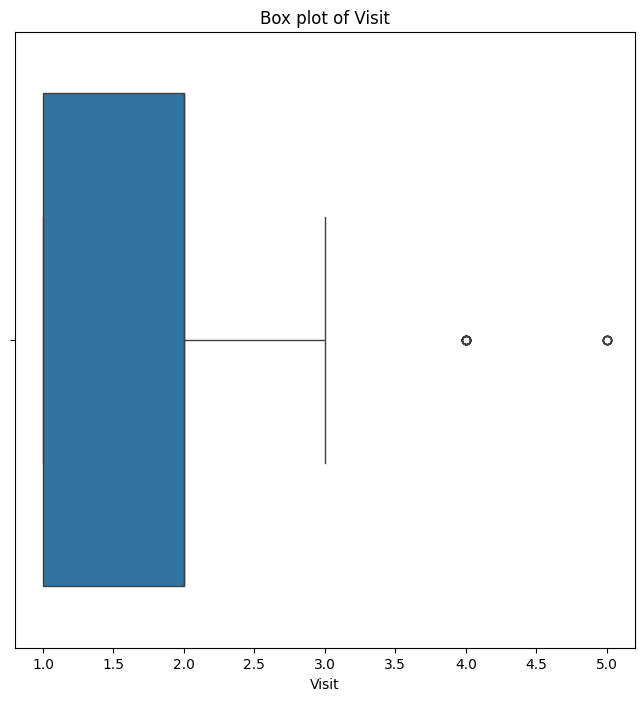

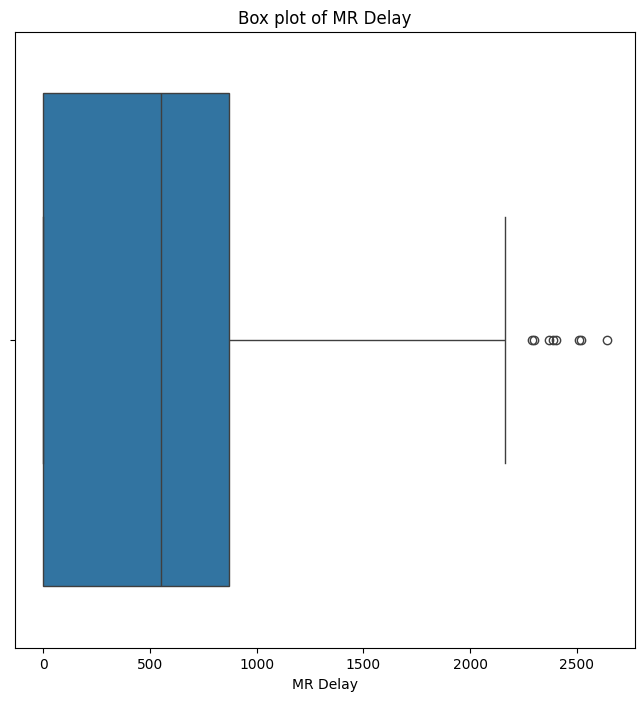

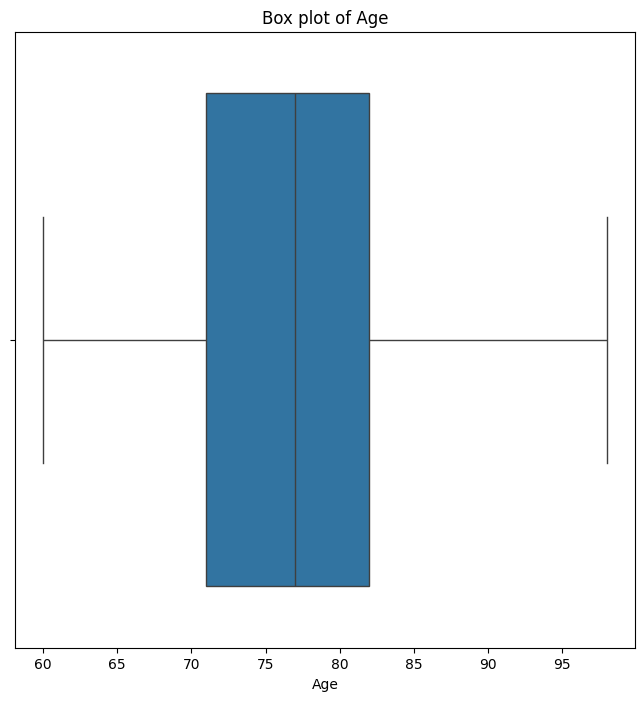

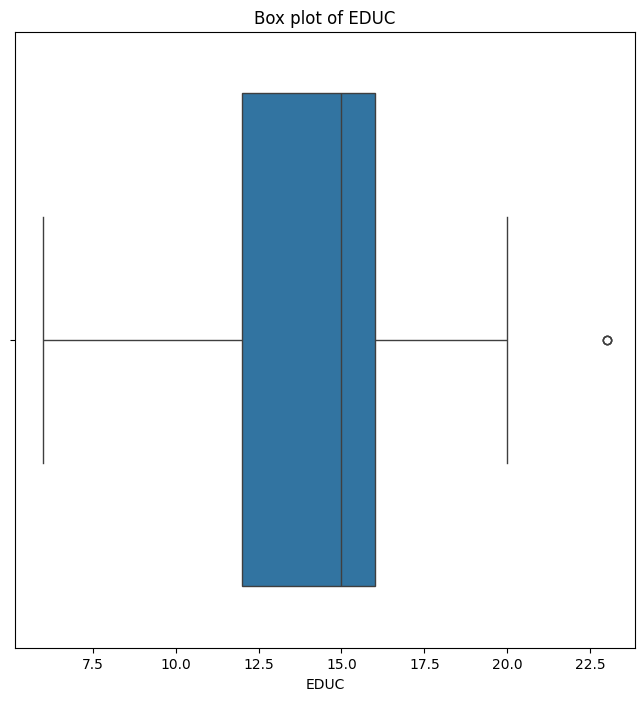

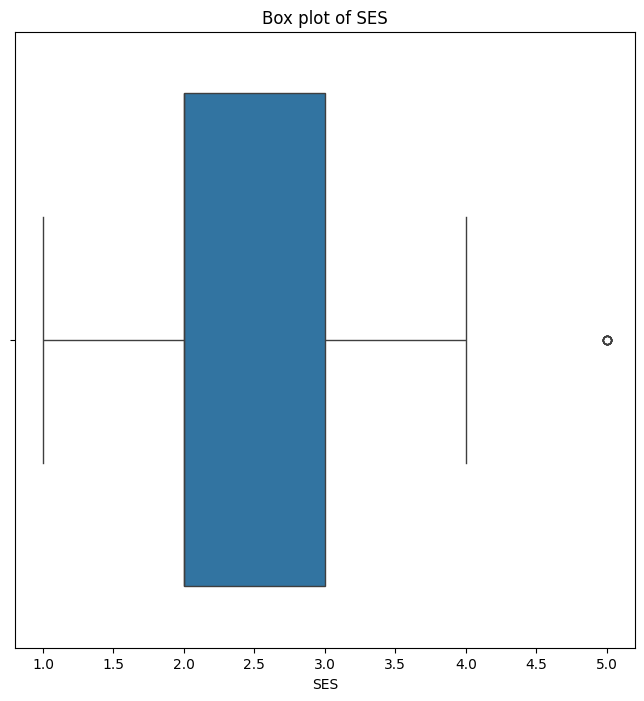

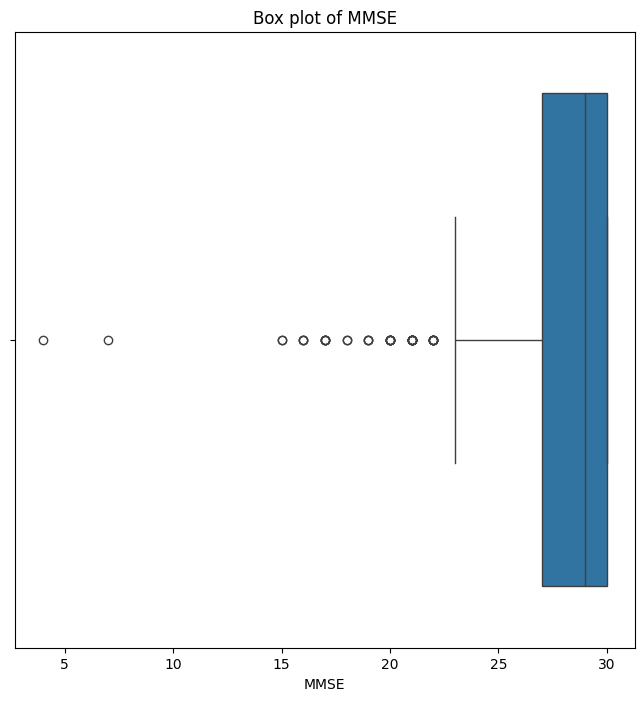

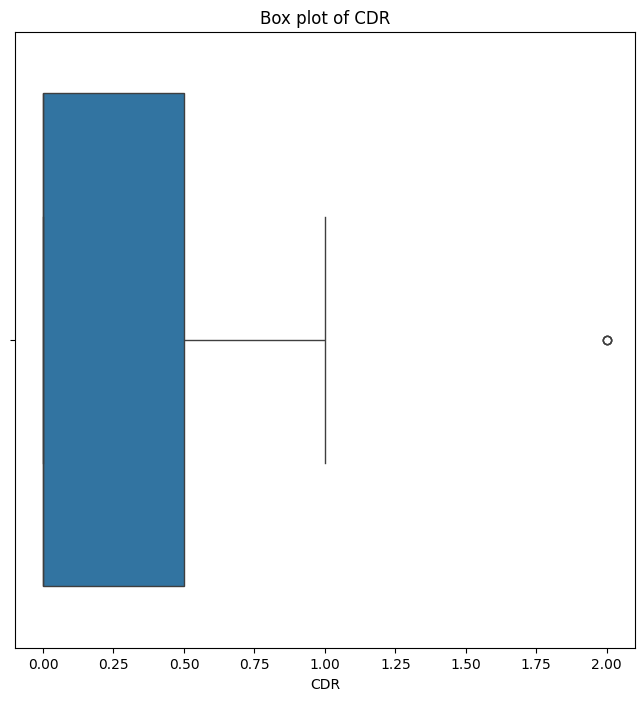

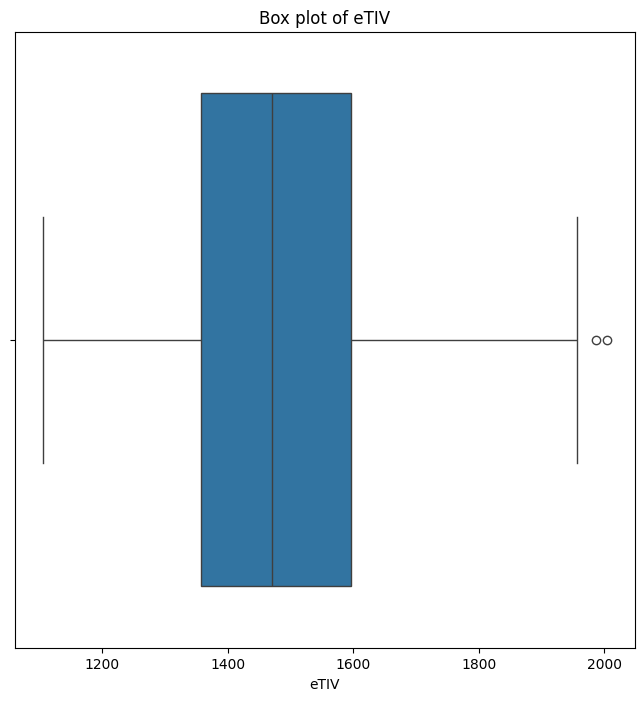

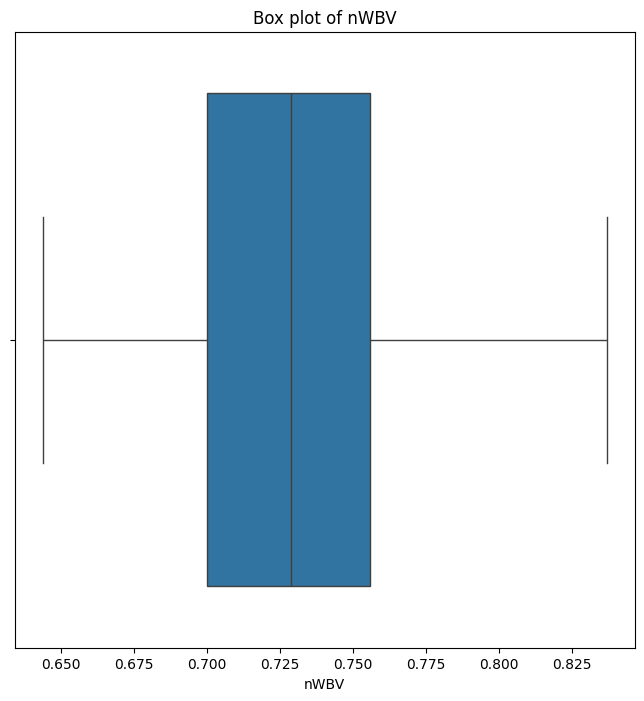

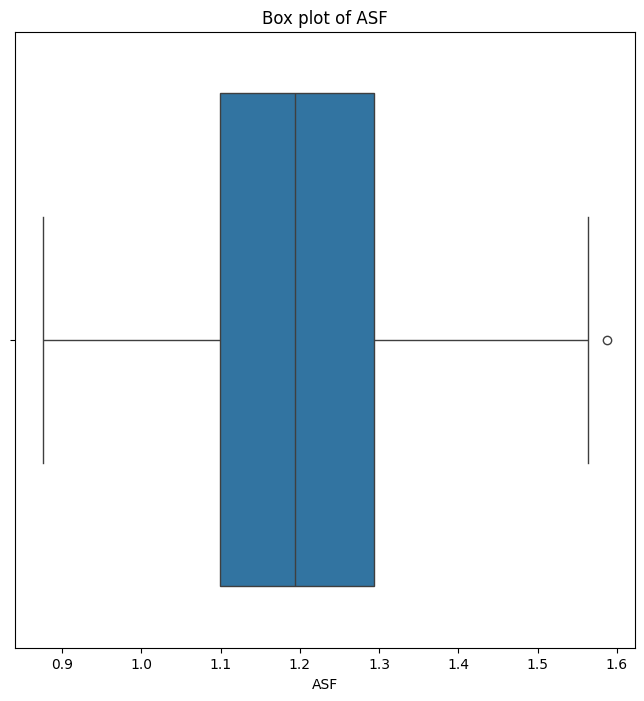

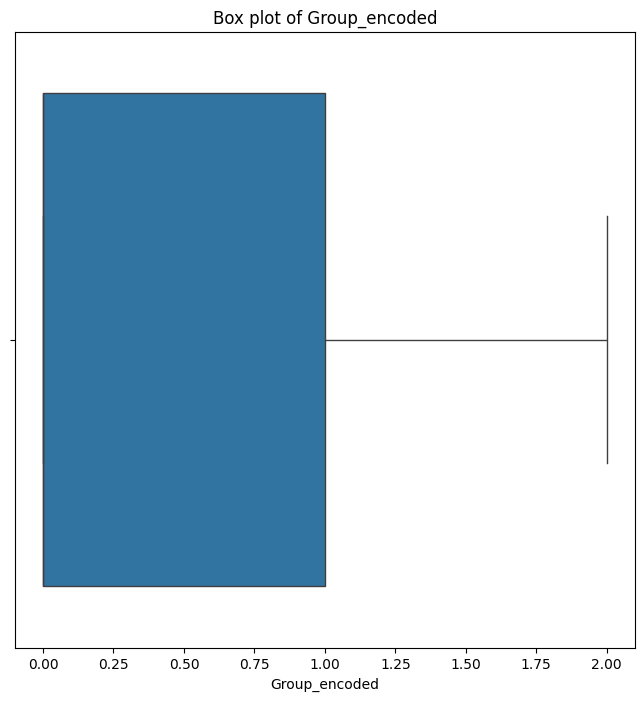

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Plot box plots for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(8, 8))
    sns.boxplot(x=data[col])
    plt.title(f'Box plot of {col}')
    plt.show()


 PLOTTING HISTOGRAMS TO KNOW THE DISTRIBUTION OF DATA

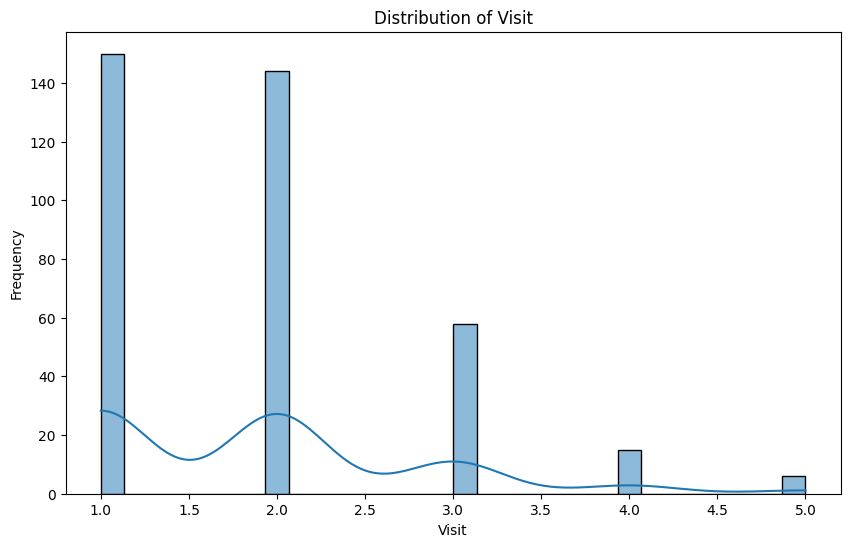

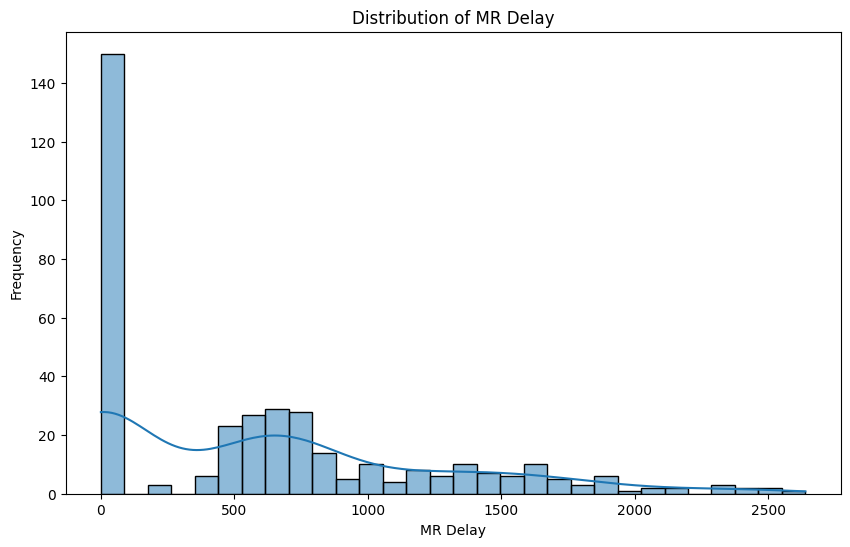

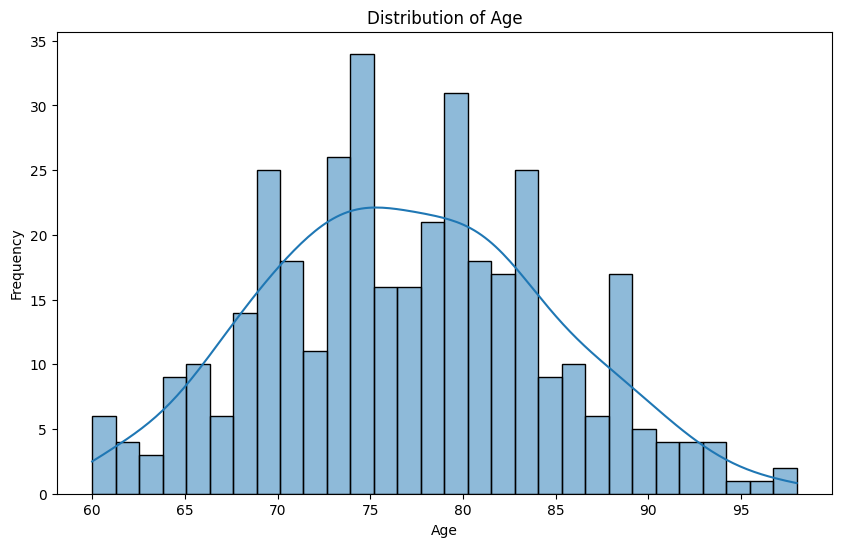

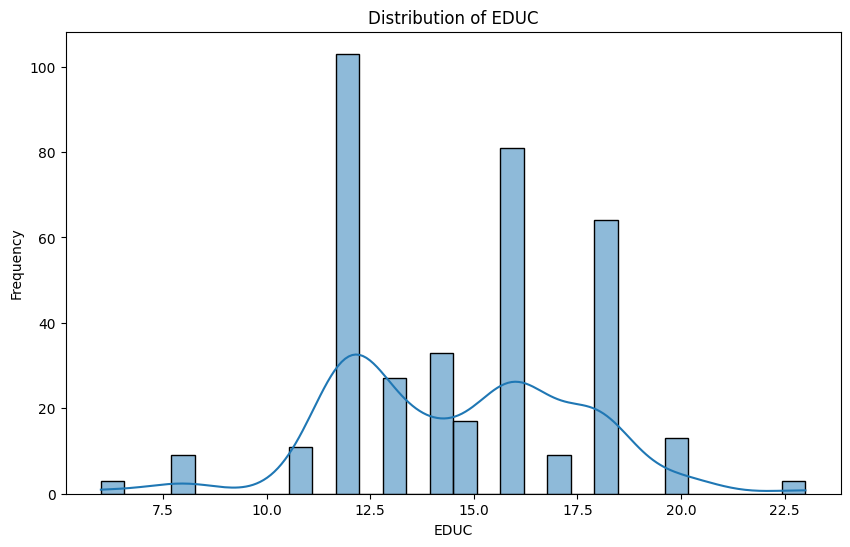

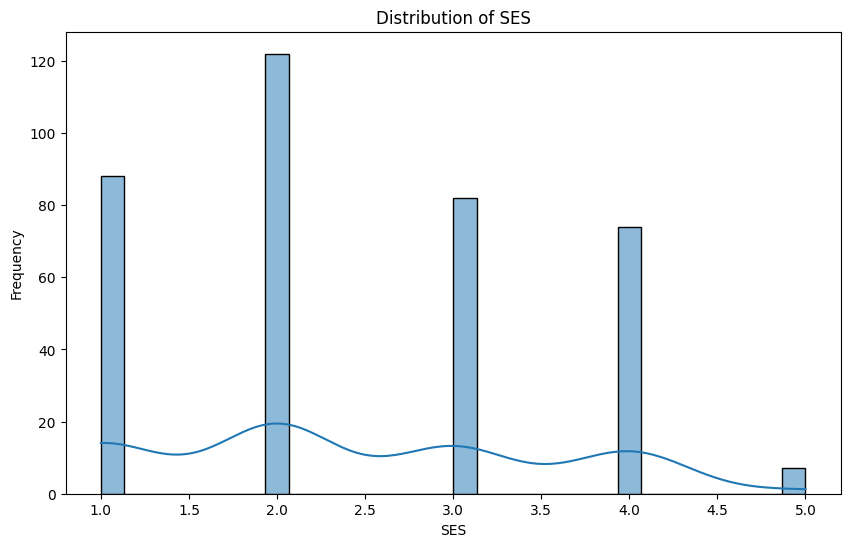

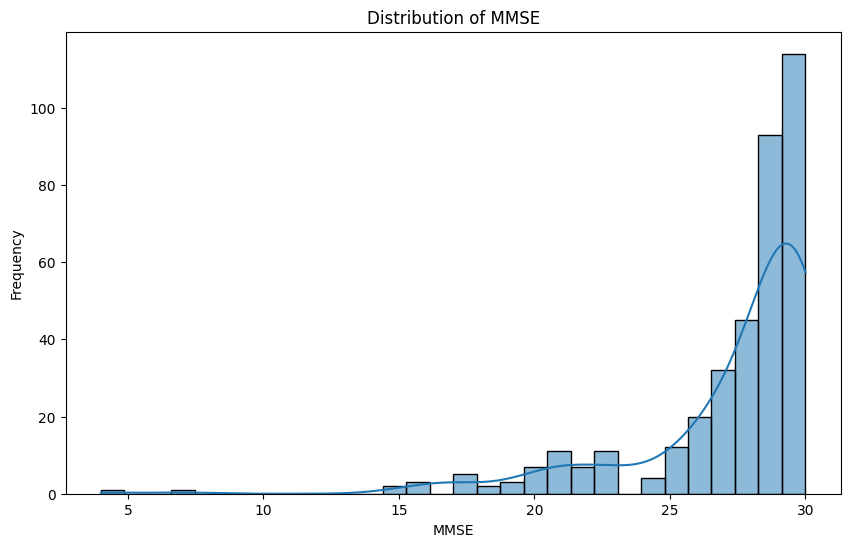

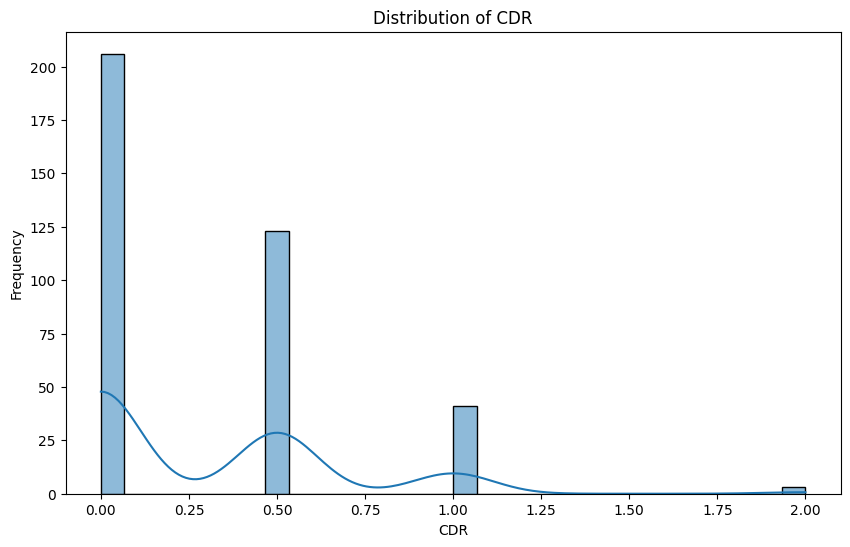

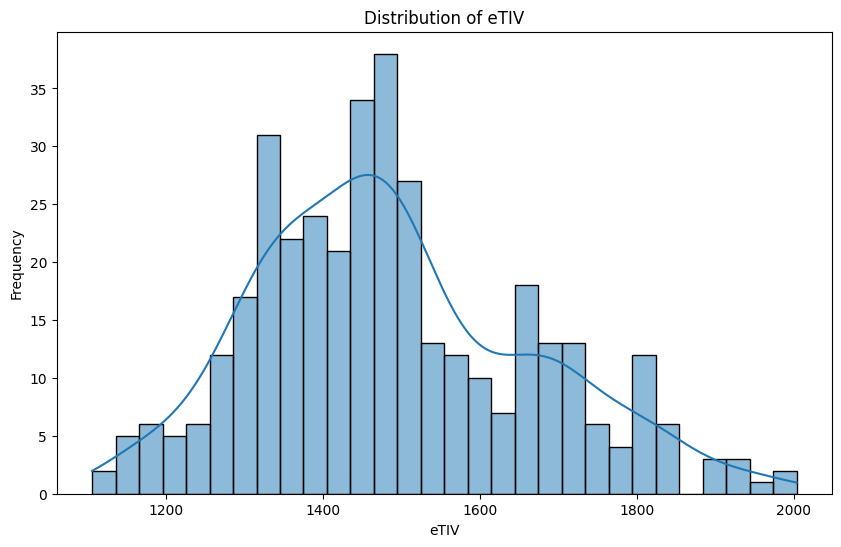

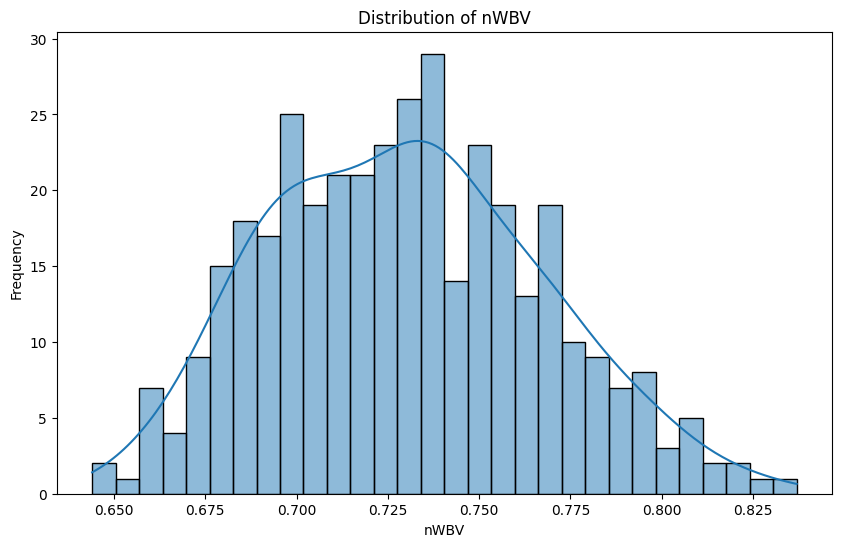

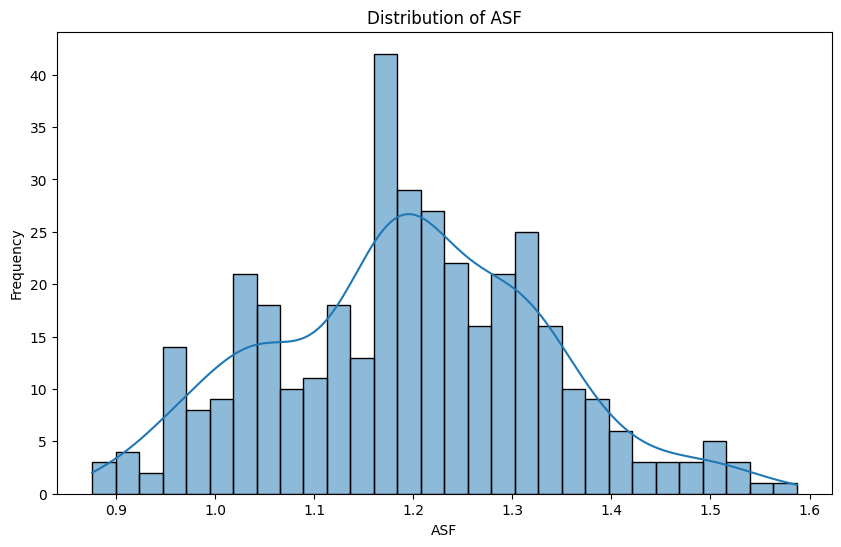

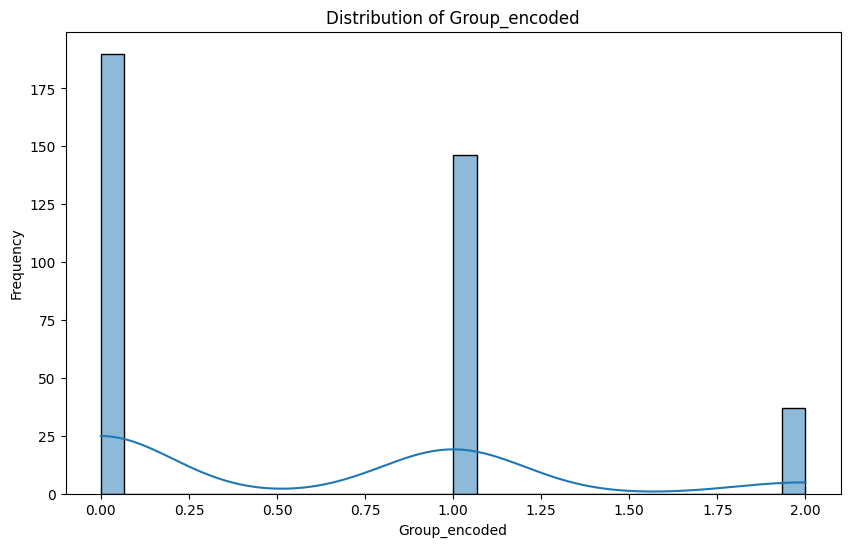

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your pandas DataFrame and it contains numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], kde=True, bins=30)  # KDE plot overlays the histogram with a density estimation
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


Histograms of Visit and MR Delay: 
These are discrete variables, and their histograms are not smooth. The 'Visit' histogram shows a high frequency for 1 and 2, with fewer observations for higher numbers, indicating most subjects had 1 or 2 visits. 'MR Delay' shows a right-skewed distribution, with most delays being short and a few subjects having long delays.

Histograms of Age, EDUC, SES, MMSE, CDR, eTIV, nWBV, ASF: These histograms show a variety of distributions:
1.Age appears to be normally distributed with a slight right skew due to a tail of older subjects.
2.EDUC has a multimodal distribution, which might indicate different educational attainment levels that are common in the population.
3.SES also appears to be multimodal, potentially reflecting common socioeconomic statuses.
4.MMSE scores are left-skewed, with most subjects scoring high (towards the maximum score), which is typical as MMSE measures cognitive impairment and higher scores represent normal function.
5.CDR (Clinical Dementia Rating) shows that most subjects have low scores, with a smaller number showing higher levels of impairment.
6.eTIV (Estimated Total Intracranial Volume) looks normally distributed with a slight right skew.
7.nWBV (Normalized Whole Brain Volume) appears normally distributed.
8.ASF (Atlas Scaling Factor) looks normally distributed with a slight right skew.
Skewness in the data can be quantitatively measured using statistical tests. For instance, a skewness value closer to zero indicates a more symmetrical distribution, whereas a positive skewness value indicates a right skew and a negative value indicates a left skew.  

TO DO:Transformations to normalize the data distributions.

In [15]:
#OUTLIERS HANDLING 
# the Interquartile Range (IQR) method to detect outliers, which is a common statistical technique to find values that are significantly higher or lower than the rest of the data.
# Filter the DataFrame to include numeric columns only
numeric_data = data.select_dtypes(include=['number'])

# Identify outliers using the Interquartile Range (IQR) method on numeric data
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Determine a threshold for outliers (1.5 times the IQR from the Q1 and Q3)
outliers = ((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).sum()

# Filter to show columns with outliers
outliers[outliers > 0]



Visit       21
MR Delay     8
EDUC         3
SES          7
MMSE        42
CDR          3
eTIV         2
ASF          1
dtype: int64

This code first isolates the numeric columns from the dataset and then applies the IQR method to detect outliers within these columns. By focusing on numeric data, we avoid type errors and ensure the calculations are meaningful for outlier detection. Let's execute this corrected code.

The corrected approach, focusing on numeric columns, successfully identifies outliers across various features without encountering type errors. Here's a summary of the columns with outliers and their respective counts:

Visit: 21 outliers
MR Delay: 8 outliers
EDUC: 3 outliers
SES: 7 outliers
MMSE: 42 outliers
CDR: 3 outliers
eTIV: 2 outliers
ASF: 1 outlier
This analysis provides a clear indication of which numeric features contain outliers based on the Interquartile Range (IQR) method. 

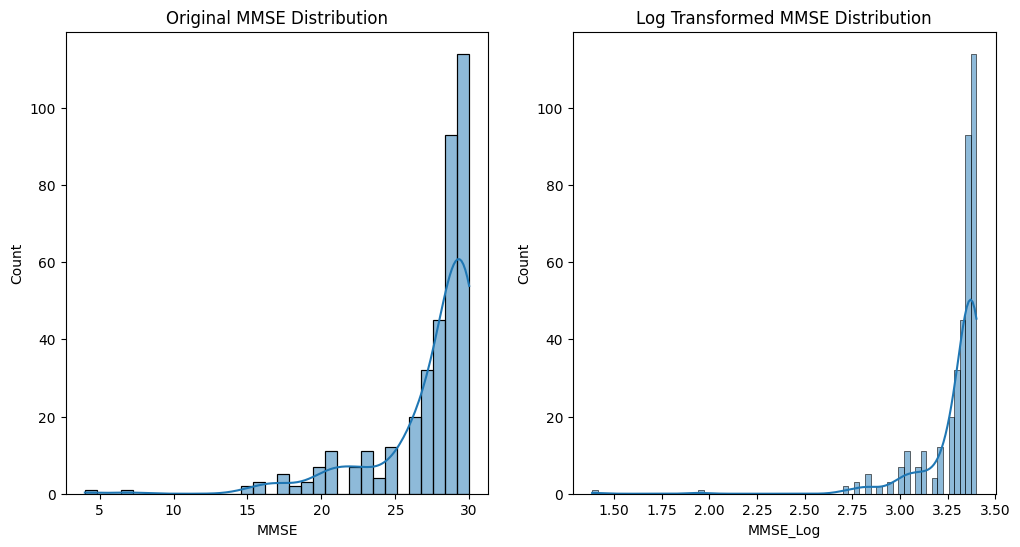

C:\Users\kusum\AppData\Local\Temp\ipykernel_7036\3998041374.py:32: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  numeric_data[capped_column_name] = numeric_data[variable].clip(lower=lower, upper=upper)


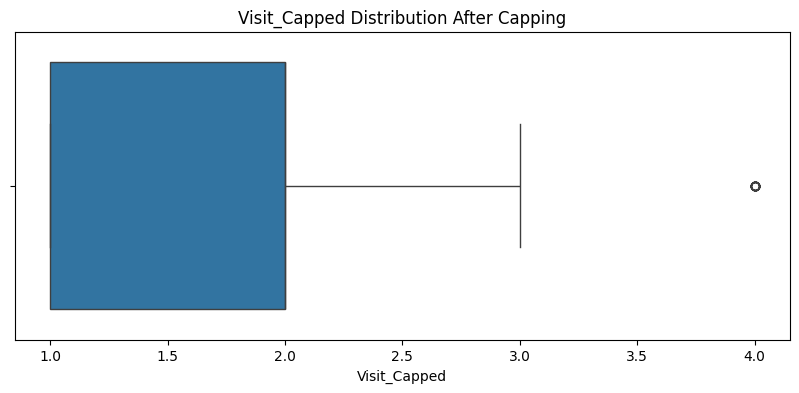

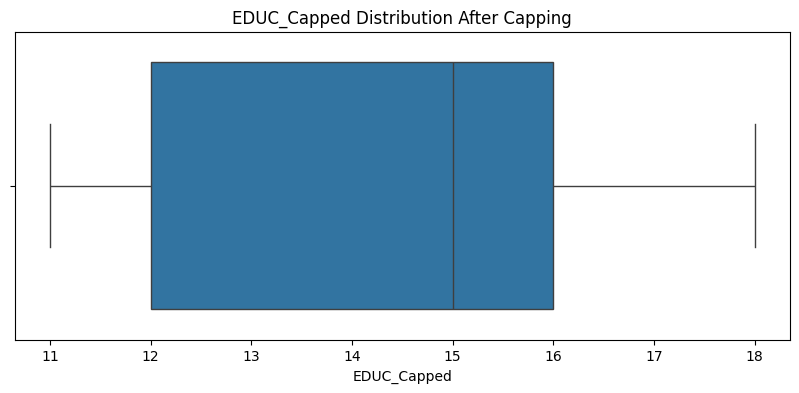

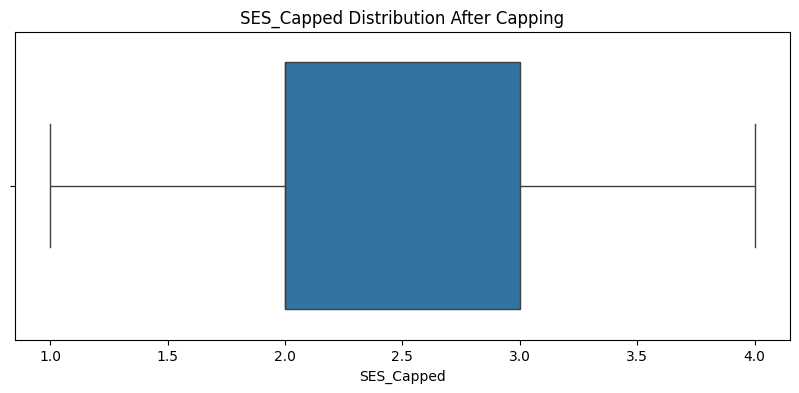

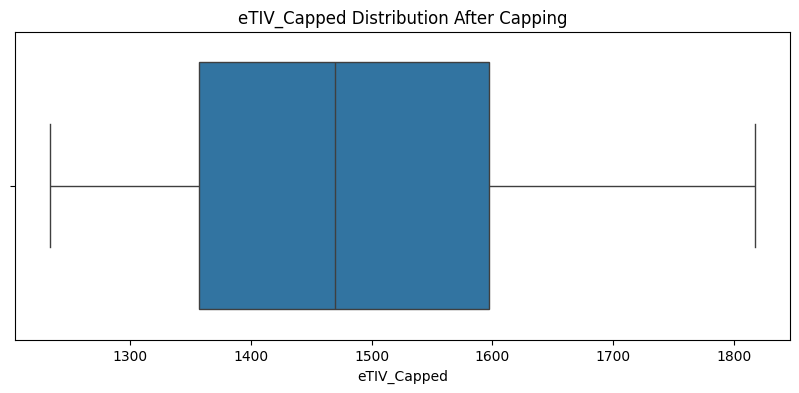

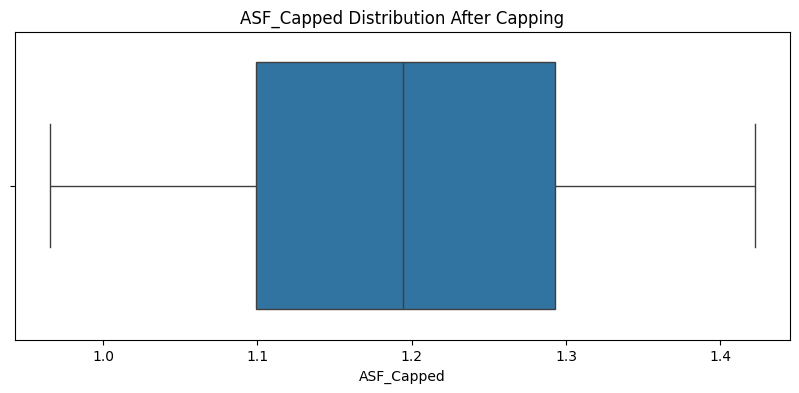

In [16]:
import numpy as np

# Step 1: Transformation for MMSE
# Check if MMSE contains any zero or negative values which cannot be log-transformed
if (numeric_data['MMSE'] <= 0).any():
    # Add a small constant to shift all values to be > 0 if necessary
    numeric_data['MMSE_Log'] = np.log(numeric_data['MMSE'] + 1)
else:
    numeric_data['MMSE_Log'] = np.log(numeric_data['MMSE'])

# Visualize the original vs. transformed MMSE distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(numeric_data['MMSE'], kde=True)
plt.title('Original MMSE Distribution')
plt.subplot(1, 2, 2)
sns.histplot(numeric_data['MMSE_Log'], kde=True)
plt.title('Log Transformed MMSE Distribution')
plt.show()

# Apply capping based on percentiles for several variables
# Note: It's important to review these operations in the context of your specific dataset and goals

percentiles = [0.05, 0.95]  # Define common percentile thresholds for capping

# Variables to cap
variables_to_cap = ['Visit', 'MR Delay', 'EDUC', 'SES', 'CDR', 'eTIV', 'ASF']

for variable in variables_to_cap:
    lower, upper = numeric_data[variable].quantile(percentiles)
    capped_column_name = f'{variable}_Capped'
    numeric_data[capped_column_name] = numeric_data[variable].clip(lower=lower, upper=upper)

# For MMSE, considering its skewness and importance in cognitive assessment, a transformation might be more suitable.
# The transformation for MMSE has been demonstrated earlier. However, if not previously transformed, you can apply:
# Ensure all MMSE values are positive; you might skip this if you're sure all values are already positive.
numeric_data['MMSE'] = numeric_data['MMSE'] + 1  # Only if needed to shift values to positive
numeric_data['MMSE_Log'] = np.log(numeric_data['MMSE'])

# Visualization to verify the effect of capping (optional)
import matplotlib.pyplot as plt
import seaborn as sns

# Choose a subset of capped variables for visualization to keep the example concise
variables_to_visualize = ['Visit_Capped', 'EDUC_Capped', 'SES_Capped', 'eTIV_Capped', 'ASF_Capped']

for variable in variables_to_visualize:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=numeric_data[variable])
    plt.title(f'{variable} Distribution After Capping')
    plt.show()



Step 1: Transformation for MMSE
We checked if the MMSE variable contains zero or negative values that cannot be directly log-transformed. Assuming all values are positive, we applied a log transformation to MMSE and visualized the original versus transformed distribution.
The histograms show the original MMSE distribution and the log-transformed MMSE distribution, illustrating how log transformation can normalize the distribution of skewed data.
Step 2: Capping for EDUC
We applied percentile-based capping to EDUC, setting outliers below the 5th percentile to the 5th percentile value and outliers above the 95th percentile to the 95th percentile value.
The box plots compare the original EDUC distribution with the capped distribution, showing the effect of capping in reducing the influence of extreme values.

These approaches—transformation and capping—are effective methods for mitigating the impact of outliers in data preprocessing, improving model performance 

C:\Users\kusum\AppData\Local\Temp\ipykernel_7036\4260281435.py:5: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['MR_Delay_Capped'] = data['MR Delay'].clip(lower=MR_Delay_5th_percentile, upper=MR_Delay_95th_percentile)


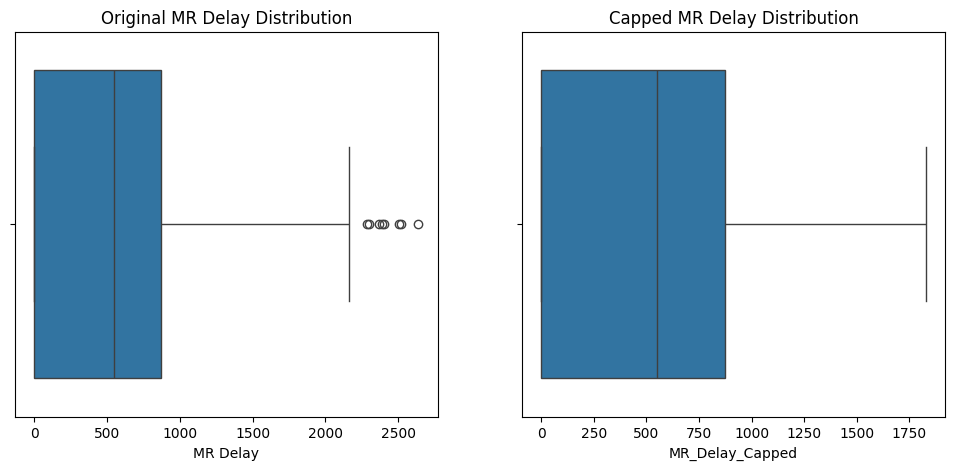

In [17]:
# Capping 'MR Delay' at the 5th and 95th percentiles
MR_Delay_5th_percentile = data['MR Delay'].quantile(0.05)
MR_Delay_95th_percentile = data['MR Delay'].quantile(0.95)

data['MR_Delay_Capped'] = data['MR Delay'].clip(lower=MR_Delay_5th_percentile, upper=MR_Delay_95th_percentile)

# Display the effect of capping on 'MR Delay' by comparing original and capped distributions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=data['MR Delay'])
plt.title('Original MR Delay Distribution')
plt.subplot(1, 2, 2)
sns.boxplot(x=data['MR_Delay_Capped'])
plt.title('Capped MR Delay Distribution')
plt.show()


In [18]:
pip install xgboost


In [19]:
from sklearn.model_selection import train_test_split

# Assuming 'numeric_data' contains all the features, including transformed and capped ones
features = [col for col in numeric_data.columns if '_Capped' in col or col == 'MMSE_Log']
X = numeric_data[features]
y = numeric_data['Group_encoded']  # Adjust 'Group_encoded' to your target variable name

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import RFE

# Assuming 'numeric_data', 'features', 'X', and 'y' are defined as in your previous code
# Also assuming X_train, X_test, y_train, and y_test are already defined from the train_test_split

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the base model for RFE and Logistic Regression with a higher number of iterations
base_model = LogisticRegression(max_iter=2000)

# Initialize RFE with the base model and desired number of features
rfe = RFE(estimator=base_model, n_features_to_select=5)  # Adjust the number as needed
rfe.fit(X_train_scaled, y_train)

# Apply RFE selection to the training data
X_train_rfe = rfe.transform(X_train_scaled)
X_test_rfe = rfe.transform(X_test_scaled)

# Perform cross-validation on the training data
cv_scores = cross_val_score(base_model, X_train_rfe, y_train, cv=5, scoring='accuracy')
print(f'Cross-validation scores on training data: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean()}')
print(f'Standard deviation of CV scores: {cv_scores.std()}')

# Re-train the Logistic Regression model with the selected features on the whole training set
model_lr_rfe = LogisticRegression(max_iter=2000)
model_lr_rfe.fit(X_train_rfe, y_train)

# Calculate accuracy on the training set
y_train_pred = model_lr_rfe.predict(X_train_rfe)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Accuracy on training set: {train_accuracy}')

# Calculate accuracy on the test set
y_test_pred = model_lr_rfe.predict(X_test_rfe)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Accuracy on test set: {test_accuracy}')

# Print classification report for the test set
print(classification_report(y_test, y_test_pred))




Cross-validation scores on training data: [0.91666667 0.93333333 0.9        0.93220339 0.96610169]
Mean cross-validation score: 0.9296610169491526
Standard deviation of CV scores: 0.021892928738952946
Accuracy on training set: 0.9328859060402684
Accuracy on test set: 0.8533333333333334
              precision    recall  f1-score   support

           0       0.79      0.97      0.87        32
           1       0.94      0.97      0.95        32
           2       0.67      0.18      0.29        11

    accuracy                           0.85        75
   macro avg       0.80      0.71      0.70        75
weighted avg       0.84      0.85      0.82        75



Accuracy
Training set accuracy: With an accuracy of about 93.29%, the model demonstrates a strong ability to correctly classify the training data.
Test set accuracy: The accuracy drops to about 85.33% on the test set, which suggests the model may be slightly overfitting to the training data but still maintains a good level of generalization.

In [22]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the base Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize Bagging with Random Forest
bagging_rf = BaggingClassifier(estimator=rf_model, n_estimators=10, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [10, 20, 30],
    'max_samples': [0.5, 0.75, 1.0],
    'max_features': [0.5, 0.75, 1.0],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=bagging_rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Get the best model from the grid search for cross-validation
best_model = grid_search.best_estimator_

# Perform cross-validation on the best model
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean():.4f}")
print(f"Standard deviation of cross-validation scores: {cv_scores.std():.4f}")

# Evaluate the best model found by GridSearchCV on the test set
y_pred_best = best_model.predict(X_test)
print("Accuracy on Test Set with Best Model:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters: {'max_features': 0.75, 'max_samples': 0.75, 'n_estimators': 20}
Best Score: 0.9228282828282829
Cross-validation scores: [0.91666667 0.93333333 0.91666667 0.88135593 0.94915254]
Mean cross-validation score: 0.9194
Standard deviation of cross-validation scores: 0.0225
Accuracy on Test Set with Best Model: 0.8666666666666667
              precision    recall  f1-score   support

           0       0.79      0.97      0.87        32
           1       0.94      1.00      0.97        32
           2       1.00      0.18      0.31        11

    accuracy                           0.87        75
   macro avg       0.91      0.72      0.72        75
weighted avg       0.89      0.87      0.83        75



The relatively close performance between the training (91.94%) and test sets (86.67%) suggests that  overfitting is present, it is minimal. The model is still capable of generalizing well to unseen data, given the solid test set accuracy.

In [23]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Assuming 'numeric_data' contains all the features and 'features', 'X', and 'y' are defined

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the scaler and scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'colsample_bytree': [0.7, 0.8, 1],
    'subsample': [0.7, 0.8, 1]
}

# Perform randomized search
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=5, scoring='accuracy', n_jobs=-1, cv=5, random_state=42)
random_search.fit(X_train_scaled, y_train)

# Print the best parameters and their corresponding score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Retrieve the best model
best_model = random_search.best_estimator_

# Perform cross-validation on the best model to evaluate its performance on the training set
cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean():.4f}")
print(f"Standard deviation of cross-validation scores: {cv_scores.std():.4f}")

# Evaluate the best model on the test set
y_pred_best = best_model.predict(X_test_scaled)
print("Accuracy on Test Set with Best Model:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))


Best Parameters: {'subsample': 0.7, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.7}
Best Score: 0.922824858757062
Cross-validation scores: [0.91666667 0.93333333 0.91666667 0.88135593 0.96610169]
Mean cross-validation score: 0.9228
Standard deviation of cross-validation scores: 0.0275
Accuracy on Test Set with Best Model: 0.8533333333333334
              precision    recall  f1-score   support

           0       0.79      0.97      0.87        32
           1       0.94      0.97      0.95        32
           2       0.67      0.18      0.29        11

    accuracy                           0.85        75
   macro avg       0.80      0.71      0.70        75
weighted avg       0.84      0.85      0.82        75



The training set accuracy, inferred from the mean cross-validation score, is around 92.28%. This score suggests that the model fits the training data well and can predict with high accuracy.
The test set accuracy is about 85.33%, which is lower than the training set accuracy. This discrepancy could indicate a mild overfitting to the training data but is still within a reasonable range, showing the model's good generalization capability.

In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

# Assuming X_train, X_test, y_train, y_test are already defined

# Define base estimators
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('xgb', xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
]

# Initialize the StackingClassifier
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=5)

# Fit the StackingClassifier on the training data
stacking_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = stacking_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Stacked Model: {accuracy:.4f}')
print(classification_report(y_test, y_pred))


Accuracy of Stacked Model: 0.8667
              precision    recall  f1-score   support

           0       0.79      0.97      0.87        32
           1       0.94      1.00      0.97        32
           2       1.00      0.18      0.31        11

    accuracy                           0.87        75
   macro avg       0.91      0.72      0.72        75
weighted avg       0.89      0.87      0.83        75

